In [ ]:
!nvidia-smi

Tue May 23 11:17:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from google.colab import files

In [ ]:
IMAGE_SIZE=[224,224]

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable=False

In [ ]:
!cp -r /content/drive/MyDrive/DataSet /content/DataSet

In [ ]:
folders=glob('/content/DataSet/train/*')

In [ ]:
folders

['/content/DataSet/train/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 '/content/DataSet/train/Scabies Lyme Disease and other Infestations and Bites',
 '/content/DataSet/train/Cellulitis Impetigo and other Bacterial Infections',
 '/content/DataSet/train/Exanthems and Drug Eruptions',
 '/content/DataSet/train/Lupus and other Connective Tissue diseases',
 '/content/DataSet/train/Systemic Disease',
 '/content/DataSet/train/Acne and Rosacea Photos',
 '/content/DataSet/train/Herpes HPV and other STDs Photos',
 '/content/DataSet/train/Vasculitis Photos',
 '/content/DataSet/train/Vascular Tumors',
 '/content/DataSet/train/Eczema Photos',
 '/content/DataSet/train/Psoriasis pictures Lichen Planus and related diseases',
 '/content/DataSet/train/Tinea Ringworm Candidiasis and other Fungal Infections',
 '/content/DataSet/train/Urticaria Hives',
 '/content/DataSet/train/Poison Ivy Photos and other Contact Dermatitis',
 '/content/DataSet/train/Seborrheic Keratoses and other B

In [ ]:
x=Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/DataSet/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 15598 images belonging to 23 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/DataSet/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4002 images belonging to 23 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

975/975 [==============================] - 4026s 4s/step - loss: 16.9322 - accuracy: 0.2019 - val_loss: 16.4779 - val_accuracy: 0.2474


In [ ]:
model.save('model_inception.h5')
files.download("/content/model_inception.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('model_inception', save_format='tf')
!zip -r /content/model_inception.zip /content/model_inception
files.download("/content/model_inception.zip")

  adding: content/model_inception/ (stored 0%)
  adding: content/model_inception/fingerprint.pb (stored 0%)
  adding: content/model_inception/keras_metadata.pb (deflated 96%)
  adding: content/model_inception/assets/ (stored 0%)
  adding: content/model_inception/saved_model.pb (deflated 92%)
  adding: content/model_inception/variables/ (stored 0%)
  adding: content/model_inception/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/model_inception/variables/variables.index (deflated 79%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
975/975 [==============================] - 344s 353ms/step - loss: 16.5629 - accuracy: 0.2864 - val_loss: 17.3659 - val_accuracy: 0.2616
Epoch 2/5
975/975 [==============================] - 339s 348ms/step - loss: 15.6291 - accuracy: 0.3234 - val_loss: 19.6504 - val_accuracy: 0.2699
Epoch 3/5
975/975 [==============================] - 333s 341ms/step - loss: 15.8698 - accuracy: 0.3541 - val_loss: 22.0076 - val_accuracy: 0.2619
Epoch 4/5
975/975 [==============================] - 332s 341ms/step - loss: 14.9525 - accuracy: 0.3830 - val_loss: 19.6607 - val_accuracy: 0.2994
Epoch 5/5
975/975 [==============================] - 333s 341ms/step - loss: 14.8557 - accuracy: 0.4034 - val_loss: 20.2985 - val_accuracy: 0.3151


In [ ]:
model.save('model_inception6.h5')
files.download("/content/model_inception6.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('model_inception6', save_format='tf')
!zip -r /content/model_inception6.zip /content/model_inception6
files.download("/content/model_inception6.zip")

  adding: content/model_inception6/ (stored 0%)
  adding: content/model_inception6/fingerprint.pb (stored 0%)
  adding: content/model_inception6/keras_metadata.pb (deflated 96%)
  adding: content/model_inception6/assets/ (stored 0%)
  adding: content/model_inception6/saved_model.pb (deflated 92%)
  adding: content/model_inception6/variables/ (stored 0%)
  adding: content/model_inception6/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/model_inception6/variables/variables.index (deflated 79%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

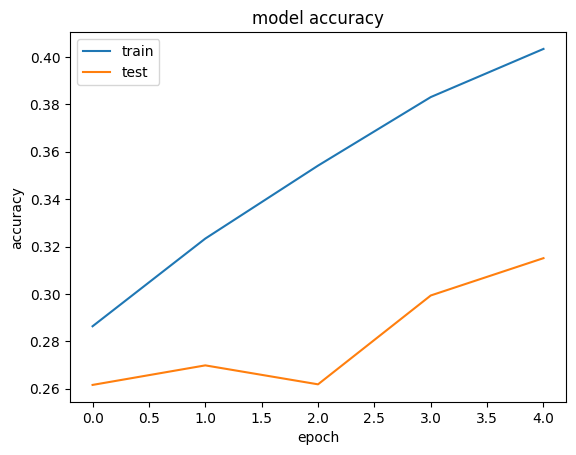

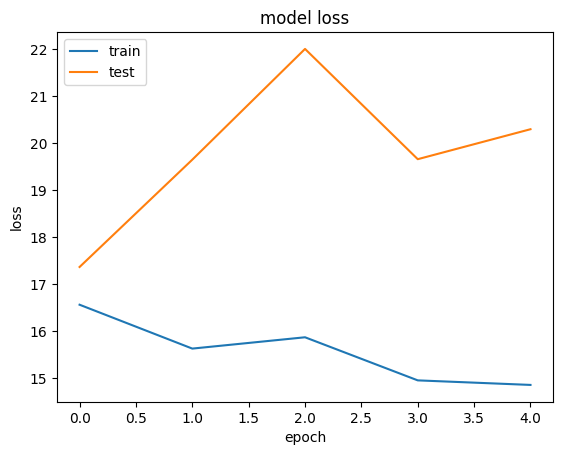

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
r1 = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
975/975 [==============================] - 346s 354ms/step - loss: 14.0515 - accuracy: 0.4259 - val_loss: 20.1920 - val_accuracy: 0.3046
Epoch 2/5
975/975 [==============================] - 339s 347ms/step - loss: 14.1215 - accuracy: 0.4355 - val_loss: 21.9620 - val_accuracy: 0.3208
Epoch 3/5
975/975 [==============================] - 336s 345ms/step - loss: 13.8727 - accuracy: 0.4484 - val_loss: 24.7581 - val_accuracy: 0.2976
Epoch 4/5
975/975 [==============================] - 336s 344ms/step - loss: 13.7680 - accuracy: 0.4699 - val_loss: 23.9459 - val_accuracy: 0.3116
Epoch 5/5
975/975 [==============================] - 338s 347ms/step - loss: 12.8607 - accuracy: 0.4838 - val_loss: 26.0133 - val_accuracy: 0.2831


In [ ]:
model.save('model_inception11.h5')
files.download("/content/model_inception11.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('model_inception11', save_format='tf')
!zip -r /content/model_inception11.zip /content/model_inception11
files.download("/content/model_inception11.zip")

  adding: content/model_inception11/ (stored 0%)
  adding: content/model_inception11/fingerprint.pb (stored 0%)
  adding: content/model_inception11/keras_metadata.pb (deflated 96%)
  adding: content/model_inception11/assets/ (stored 0%)
  adding: content/model_inception11/saved_model.pb (deflated 92%)
  adding: content/model_inception11/variables/ (stored 0%)
  adding: content/model_inception11/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/model_inception11/variables/variables.index (deflated 79%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

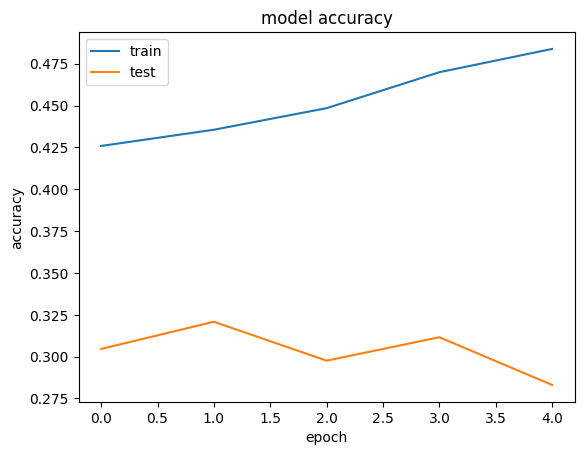

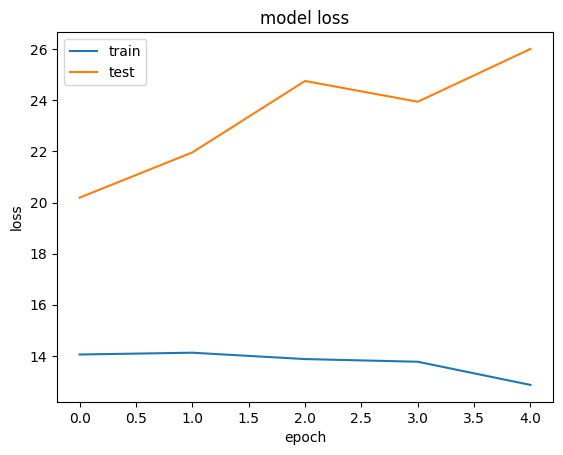

In [ ]:
plt.plot(r1.history['accuracy'])
plt.plot(r1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r1.history['loss'])
plt.plot(r1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
r2 = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
975/975 [==============================] - 345s 353ms/step - loss: 13.2860 - accuracy: 0.4850 - val_loss: 26.6278 - val_accuracy: 0.3233
Epoch 2/5
975/975 [==============================] - 339s 348ms/step - loss: 12.5317 - accuracy: 0.5066 - val_loss: 24.5263 - val_accuracy: 0.3188
Epoch 3/5
975/975 [==============================] - 349s 357ms/step - loss: 13.0398 - accuracy: 0.5061 - val_loss: 23.4452 - val_accuracy: 0.3453
Epoch 4/5
975/975 [==============================] - 348s 357ms/step - loss: 12.5730 - accuracy: 0.5152 - val_loss: 26.9883 - val_accuracy: 0.3186
Epoch 5/5
975/975 [==============================] - 342s 351ms/step - loss: 12.5029 - accuracy: 0.5238 - val_loss: 28.4748 - val_accuracy: 0.3181


In [ ]:
model.save('model_inception16.h5')
model.save('model_inception16', save_format='tf')
!zip -r /content/model_inception16.zip /content/model_inception16

  adding: content/model_inception16/ (stored 0%)
  adding: content/model_inception16/fingerprint.pb (stored 0%)
  adding: content/model_inception16/keras_metadata.pb (deflated 96%)
  adding: content/model_inception16/assets/ (stored 0%)
  adding: content/model_inception16/saved_model.pb (deflated 92%)
  adding: content/model_inception16/variables/ (stored 0%)
  adding: content/model_inception16/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model_inception16/variables/variables.index (deflated 79%)


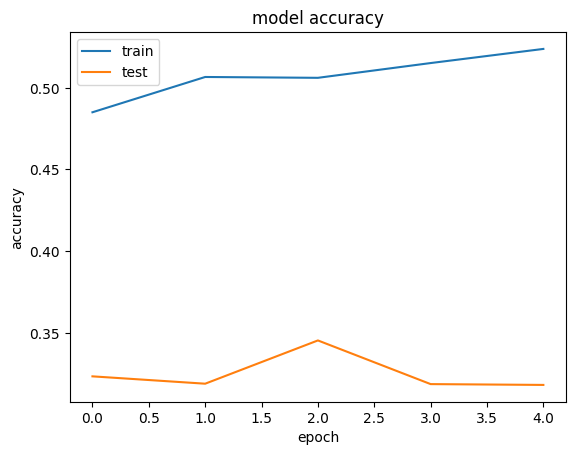

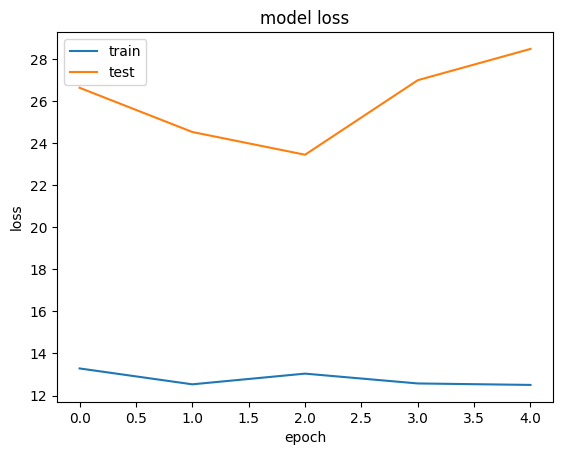

In [ ]:
plt.plot(r2.history['accuracy'])
plt.plot(r2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r2.history['loss'])
plt.plot(r2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
r3 = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
975/975 [==============================] - 364s 373ms/step - loss: 12.0814 - accuracy: 0.5375 - val_loss: 24.6571 - val_accuracy: 0.3538
Epoch 2/5
975/975 [==============================] - 344s 353ms/step - loss: 11.8011 - accuracy: 0.5434 - val_loss: 25.2620 - val_accuracy: 0.3373
Epoch 3/5
975/975 [==============================] - 339s 348ms/step - loss: 12.1304 - accuracy: 0.5418 - val_loss: 25.9366 - val_accuracy: 0.3358
Epoch 4/5
975/975 [==============================] - 341s 350ms/step - loss: 11.6673 - accuracy: 0.5563 - val_loss: 25.0441 - val_accuracy: 0.3306
Epoch 5/5
975/975 [==============================] - 346s 354ms/step - loss: 11.6426 - accuracy: 0.5564 - val_loss: 26.2879 - val_accuracy: 0.3596


In [ ]:
model.save('model_inception21.h5')
model.save('model_inception21', save_format='tf')
!zip -r /content/model_inception21.zip /content/model_inception21

  adding: content/model_inception21/ (stored 0%)
  adding: content/model_inception21/fingerprint.pb (stored 0%)
  adding: content/model_inception21/keras_metadata.pb (deflated 96%)
  adding: content/model_inception21/assets/ (stored 0%)
  adding: content/model_inception21/saved_model.pb (deflated 92%)
  adding: content/model_inception21/variables/ (stored 0%)
  adding: content/model_inception21/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model_inception21/variables/variables.index (deflated 79%)


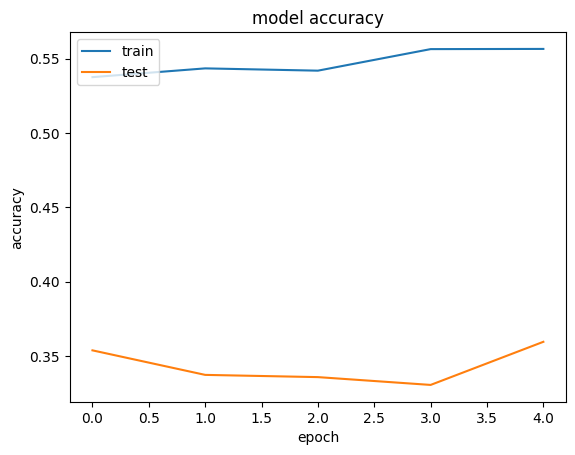

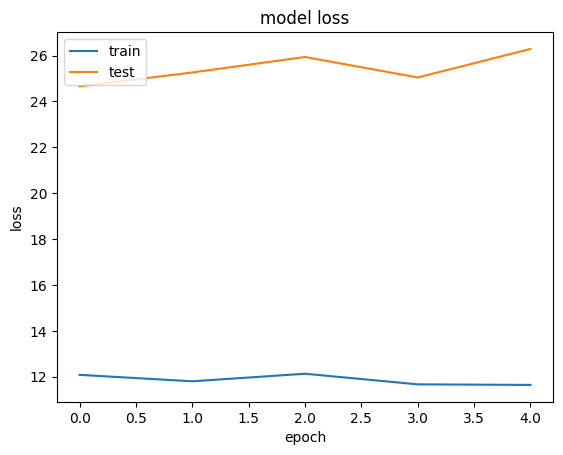

In [ ]:
plt.plot(r3.history['accuracy'])
plt.plot(r3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r3.history['loss'])
plt.plot(r3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
r4 = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
975/975 [==============================] - 345s 354ms/step - loss: 12.3272 - accuracy: 0.5291 - val_loss: 26.4897 - val_accuracy: 0.3458
Epoch 2/5
975/975 [==============================] - 311s 319ms/step - loss: 12.2726 - accuracy: 0.5341 - val_loss: 26.7348 - val_accuracy: 0.3371
Epoch 3/5
975/975 [==============================] - 310s 318ms/step - loss: 12.0770 - accuracy: 0.5443 - val_loss: 26.4003 - val_accuracy: 0.3493
Epoch 4/5
975/975 [==============================] - 310s 318ms/step - loss: 11.8113 - accuracy: 0.5496 - val_loss: 30.3091 - val_accuracy: 0.3278
Epoch 5/5
975/975 [==============================] - 307s 315ms/step - loss: 11.8241 - accuracy: 0.5562 - val_loss: 28.8198 - val_accuracy: 0.3328


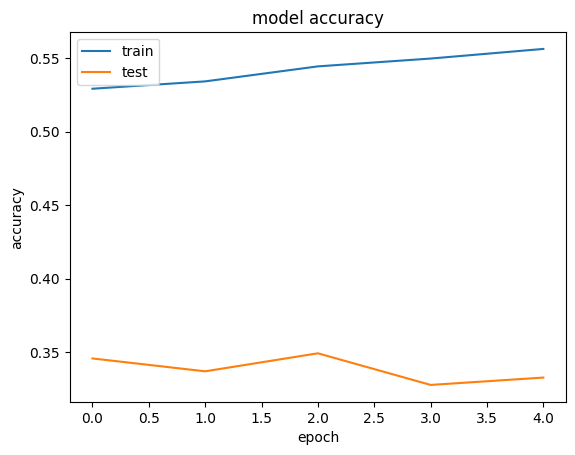

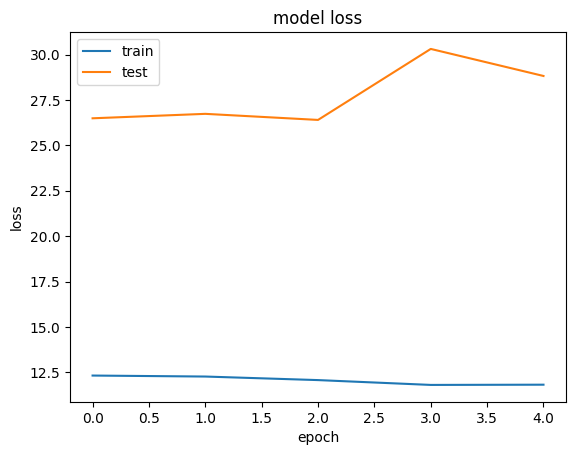

In [ ]:
plt.plot(r4.history['accuracy'])
plt.plot(r4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r4.history['loss'])
plt.plot(r4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('model_inception21.h5')
model.save('model_inception21', save_format='tf')
!zip -r /content/model_inception21.zip /content/model_inception21

  adding: content/model_inception21/ (stored 0%)
  adding: content/model_inception21/fingerprint.pb (stored 0%)
  adding: content/model_inception21/keras_metadata.pb (deflated 96%)
  adding: content/model_inception21/assets/ (stored 0%)
  adding: content/model_inception21/saved_model.pb (deflated 92%)
  adding: content/model_inception21/variables/ (stored 0%)
  adding: content/model_inception21/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model_inception21/variables/variables.index (deflated 79%)


In [ ]:
r5 = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
975/975 [==============================] - 317s 325ms/step - loss: 11.5542 - accuracy: 0.5642 - val_loss: 28.9269 - val_accuracy: 0.3301
Epoch 2/10
975/975 [==============================] - 308s 316ms/step - loss: 11.4100 - accuracy: 0.5712 - val_loss: 28.7222 - val_accuracy: 0.3481
Epoch 3/10
975/975 [==============================] - 308s 316ms/step - loss: 11.1401 - accuracy: 0.5753 - val_loss: 29.8150 - val_accuracy: 0.3386
Epoch 4/10
975/975 [==============================] - 312s 320ms/step - loss: 11.2187 - accuracy: 0.5819 - val_loss: 28.8880 - val_accuracy: 0.3456
Epoch 5/10
975/975 [==============================] - 311s 319ms/step - loss: 11.2930 - accuracy: 0.5860 - val_loss: 29.3766 - val_accuracy: 0.3471
Epoch 6/10
975/975 [==============================] - 319s 327ms/step - loss: 10.8724 - accuracy: 0.5958 - val_loss: 31.2570 - val_accuracy: 0.3391
Epoch 7/10
975/975 [==============================] - 315s 323ms/step - loss: 10.8815 - accuracy: 0.5950 - val_l

In [ ]:
model.save('model_inception31.h5')
model.save('model_inception31', save_format='tf')
!zip -r /content/model_inception31.zip /content/model_inception31

  adding: content/model_inception31/ (stored 0%)
  adding: content/model_inception31/fingerprint.pb (stored 0%)
  adding: content/model_inception31/keras_metadata.pb (deflated 96%)
  adding: content/model_inception31/assets/ (stored 0%)
  adding: content/model_inception31/saved_model.pb (deflated 92%)
  adding: content/model_inception31/variables/ (stored 0%)
  adding: content/model_inception31/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model_inception31/variables/variables.index (deflated 79%)


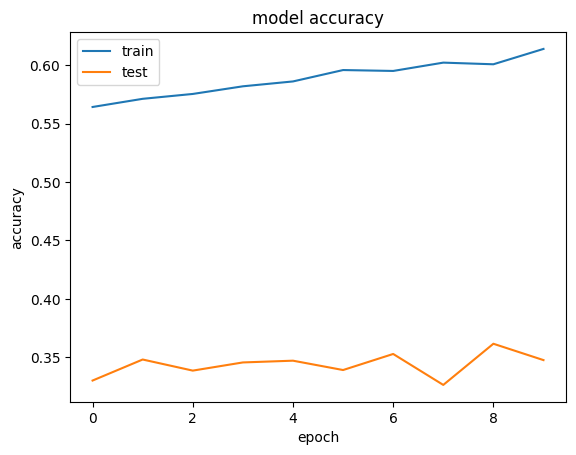

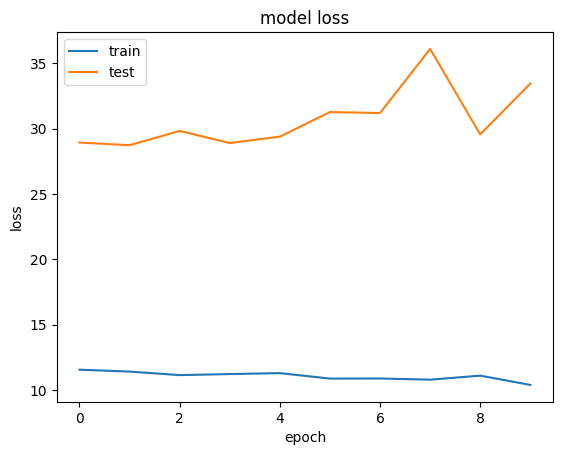

In [ ]:
plt.plot(r5.history['accuracy'])
plt.plot(r5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r5.history['loss'])
plt.plot(r5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
r6 = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
975/975 [==============================] - 318s 326ms/step - loss: 10.7082 - accuracy: 0.6073 - val_loss: 31.4567 - val_accuracy: 0.3453
Epoch 2/5
975/975 [==============================] - 312s 320ms/step - loss: 10.5105 - accuracy: 0.6149 - val_loss: 30.1790 - val_accuracy: 0.3563
Epoch 3/5
975/975 [==============================] - 314s 322ms/step - loss: 10.4428 - accuracy: 0.6235 - val_loss: 31.2441 - val_accuracy: 0.3283
Epoch 4/5
975/975 [==============================] - 318s 326ms/step - loss: 10.4285 - accuracy: 0.6214 - val_loss: 30.5267 - val_accuracy: 0.3603
Epoch 5/5
975/975 [==============================] - 318s 326ms/step - loss: 10.4039 - accuracy: 0.6235 - val_loss: 30.5311 - val_accuracy: 0.3801


In [ ]:
model.save('model_inception36.h5')
model.save('model_inception36', save_format='tf')
!zip -r /content/model_inception36.zip /content/model_inception36

  adding: content/model_inception36/ (stored 0%)
  adding: content/model_inception36/fingerprint.pb (stored 0%)
  adding: content/model_inception36/keras_metadata.pb (deflated 96%)
  adding: content/model_inception36/assets/ (stored 0%)
  adding: content/model_inception36/saved_model.pb (deflated 92%)
  adding: content/model_inception36/variables/ (stored 0%)
  adding: content/model_inception36/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model_inception36/variables/variables.index (deflated 79%)


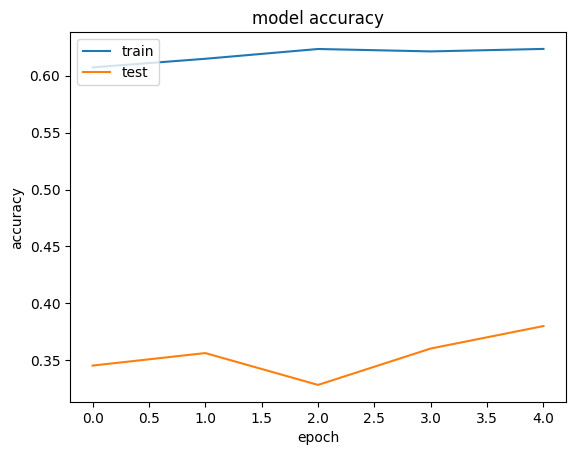

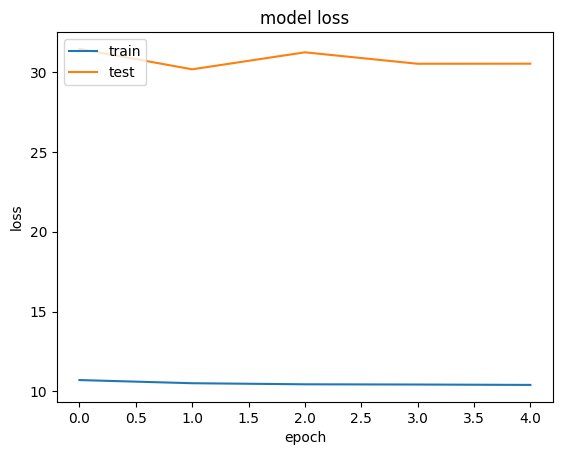

In [ ]:
plt.plot(r6.history['accuracy'])
plt.plot(r6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r6.history['loss'])
plt.plot(r6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
valid_loss, valid_acc = model.evaluate(test_set, steps=len(test_set))
print(f"Final validation accuracy: {valid_acc*100:.2f}%")

251/251 [==============================] - 34s 136ms/step - loss: 30.5311 - accuracy: 0.3801
Final validation accuracy: 38.01%


In [ ]:
valid_loss, valid_acc = model.evaluate(training_set, steps=len(training_set))
print(f"Final validation accuracy: {valid_acc*100:.2f}%")

975/975 [==============================] - 296s 304ms/step - loss: 8.6172 - accuracy: 0.6673
Final validation accuracy: 66.73%


1/1 [==============================] - 0s 37ms/step
/content/DataSet/train/Scabies Lyme Disease and other Infestations and Bites


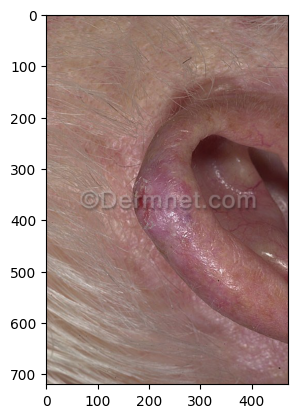

In [ ]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

path = r'/content/DataSet/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/squamous-cell-carcinoma-ear-26.jpg'
img_test = cv2.imread(path)
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(path))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(folders[input_label])

1/1 [==============================] - 0s 34ms/step
/content/DataSet/train/Eczema Photos


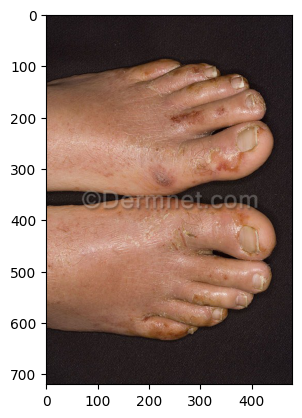

In [ ]:
path = r'/content/DataSet/test/Eczema Photos/Dyshidrosis-13.jpg'
img_test = cv2.imread(path)
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(path))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(folders[input_label])